<a href="https://colab.research.google.com/github/swopnimghimire-123123/Maths_For_ML/blob/main/Calculus_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Taylor series**

#  Why Do We Care About Approximations?

Many functions are complicated — like \( e^x \), \( \sin(x) \), or \( \ln(x) \).  
We often want to *approximate* them with something simpler. Instead of working with the exact curve, we use **polynomials** that are easier to compute.

### Idea:
- If you zoom in on a curve at a point, it starts to look like a straight line.  
- That straight line is the **tangent line** at that point.  
- So the tangent line is our **first approximation** of the curve.  

This is the basic idea behind the **Taylor series**:  
> Replace a complicated function with a polynomial that is easier to handle but still follows the function closely (at least near one point).

---

### Real-Life Analogy:
Think about Earth’s surface:
- From space → it’s a sphere (complicated surface).  
- Standing on the ground → it feels flat (line approximation of the curve).  
- The closer you stay, the better the flat approximation works.

---

### Example:
Here, we’ll approximate \(\sin(x)\) near \(x=0\).  
- At \(x=0\), \(\sin(0) = 0\).  
- The slope (derivative) is \(\cos(0) = 1\).  
- So the tangent line is \( y = x \).  

We’ll compare the true curve \(\sin(x)\) with the line \(y=x\).


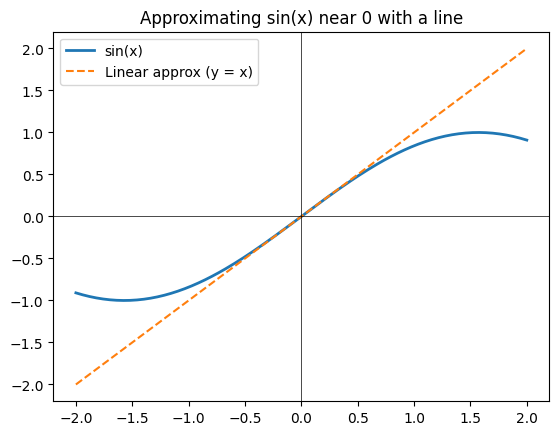

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# True function
x = np.linspace(-2, 2, 200)
y = np.sin(x)

# Linear approximation (tangent line at x=0)
# sin(0) = 0, derivative cos(0) = 1 → line: y = x
y_approx = x

plt.plot(x, y, label="sin(x)", linewidth=2)
plt.plot(x, y_approx, label="Linear approx (y = x)", linestyle="--")

plt.axhline(0, color="black", linewidth=0.5)
plt.axvline(0, color="black", linewidth=0.5)
plt.legend()
plt.title("Approximating sin(x) near 0 with a line")
plt.show()


 So in physics class, when you learned “
sin
⁡
(
𝑥
)
≈
𝑥
sin(x)≈x for small
𝑥
,” you were actually using the first step of the Taylor series without calling it that.



Linear Approx (1st Taylor Expansion)

Idea: Near a point, a curve acts like a straight line!

Math:
f(x) ≈ f(a) + f'(a)(x - a)

f(a) → value at point
f'(a) → slope there

Together = tangent line!

Example: sin(x) around a=0
sin(x) ≈ x

Remember sin(x) ≈ x for small x from physics? That's this!

Linear Approximation (first-order Taylor):
sin(x) ≈ x


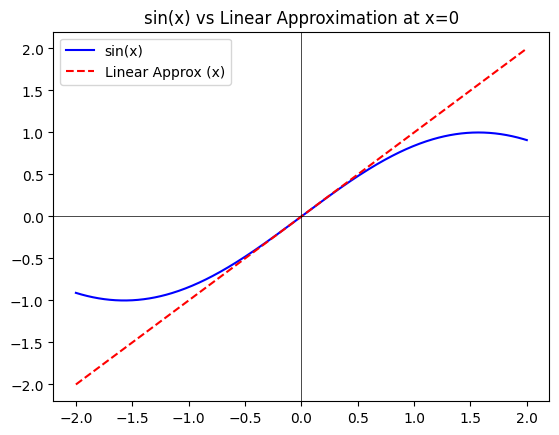

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the variable and function
x = sp.Symbol('x')
f = sp.sin(x)

# Point of expansion
a = 0

# First-order Taylor expansion around a
f_approx = f.subs(x, a) + sp.diff(f, x).subs(x, a) * (x - a)

print("Linear Approximation (first-order Taylor):")
print(f"sin(x) ≈ {f_approx}")

# Convert to numerical functions for plotting
f_func = sp.lambdify(x, f, 'numpy')
f_approx_func = sp.lambdify(x, f_approx, 'numpy')

# Plot
X = np.linspace(-2, 2, 400)
plt.plot(X, f_func(X), label='sin(x)', color='blue')
plt.plot(X, f_approx_func(X), label='Linear Approx (x)', color='red', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("sin(x) vs Linear Approximation at x=0")
plt.show()

Linear Approximation (first-order Taylor):
sin(x) ≈ (x - 3)*cos(3) + sin(3)


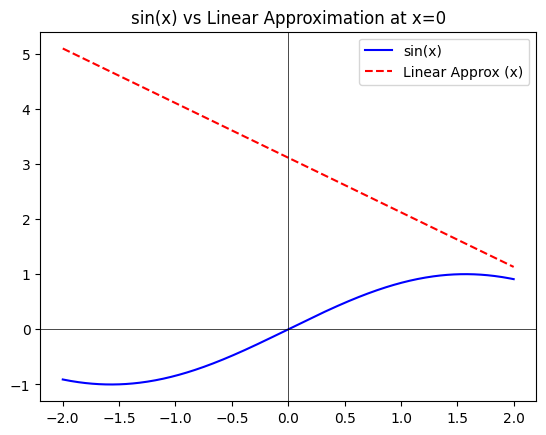

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the variable and function
x = sp.Symbol('x')
f = sp.sin(x)

# Point of expansion
a = 3

# First-order Taylor expansion around a
f_approx = f.subs(x, a) + sp.diff(f, x).subs(x, a) * (x - a)

print("Linear Approximation (first-order Taylor):")
print(f"sin(x) ≈ {f_approx}")

# Convert to numerical functions for plotting
f_func = sp.lambdify(x, f, 'numpy')
f_approx_func = sp.lambdify(x, f_approx, 'numpy')

# Plot
X = np.linspace(-2, 2, 400)
plt.plot(X, f_func(X), label='sin(x)', color='blue')
plt.plot(X, f_approx_func(X), label='Linear Approx (x)', color='red', linestyle='--')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("sin(x) vs Linear Approximation at x=0")
plt.show()

### Why a=0?

Mostly cuz the math is simpler there for many functions (like sin, cos, e^x). sin(0)=0, cos(0)=1 make things neat!

Also, it's great for small angle/argument approximations often used in physics (like sin(x) ≈ x for small x).

BUT you can expand around *any* point 'a'! The tangent line will just hug the curve near *that* point instead of 0.

It's just the most common spot, not the only one!

# Why Just a Tangent Line Isn't Enough


---


If we only use the linear approximation (the tangent line), it's only accurate *very* close to the point we approximate around (point 'a').

As soon as we move away, the straight line *drifts* away from the actual curve!

The Solution: Add More Detail with Higher Derivatives!


---


To get a better fit, we don't just use the slope (1st derivative). We also use:

- **Curvature** (2nd derivative): How the curve bends.
- **Wiggle/Inflection** (3rd derivative): How the bending changes.
- ... and so on!

Each higher derivative adds more *information* about the function's shape, allowing the polynomial to match the curve better.

Think of it like building a more detailed picture:
- **1st Derivative:** Gets the position and initial direction right.
- **2nd Derivative:** Adds the main curve/bend.
- **3rd Derivative:** Adds twists and turns.
- **Higher Derivatives:** Refine the shape even more!

Example with e^x around x=0:

e^x ≈ 1 + x + x²/2! + x³/3! + ...

- **1:** Matches the value at x=0 (e⁰ = 1).
- **+x:** Matches the slope at x=0 (derivative of e^x is e^x, e⁰ = 1).
- **+x²/2!:** Matches the curvature at x=0 (2nd derivative is e^x, e⁰/2! = 1/2!).
- **+x³/3!:** Matches the wiggle at x=0 (3rd derivative is e^x, e⁰/3! = 1/6!).

The more terms (and thus, more derivatives) we add, the better the polynomial *hugs* the original curve over a wider range!


---


**Key Takeaway:** The Taylor series gets its amazing accuracy by stacking information from *all* the derivatives of the function at a single point ('a') to build a powerful approximating polynomial!

Taylor polynomial (degree 1): x + 1
Taylor polynomial (degree 2): x**2/2 + x + 1
Taylor polynomial (degree 3): x**3/6 + x**2/2 + x + 1
Taylor polynomial (degree 4): x**4/24 + x**3/6 + x**2/2 + x + 1


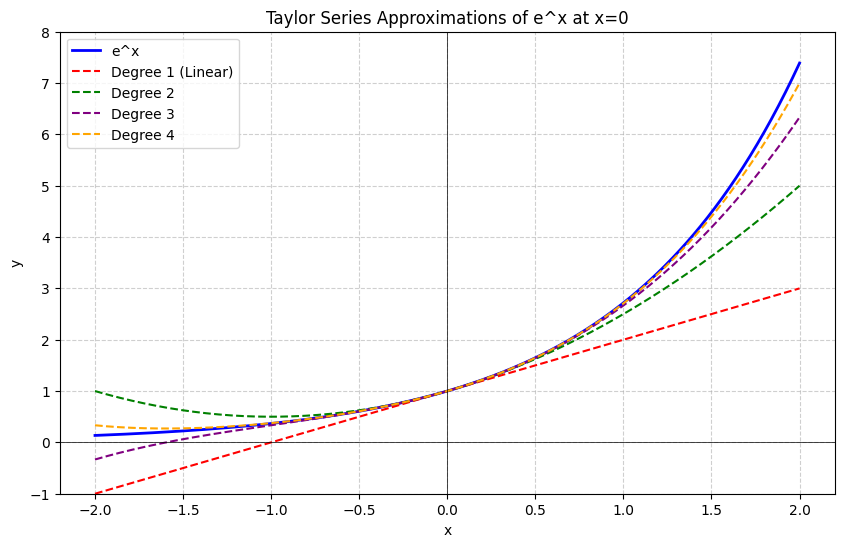

In [ ]:

import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define the variable and function
x = sp.Symbol('x')
f = sp.exp(x)  # Using e^x as the example function

# Point of expansion
a = 0

# Function to generate Taylor polynomial
def taylor_polynomial(function, variable, point, degree):
    taylor_poly = 0
    for i in range(degree + 1):
        derivative = sp.diff(function, variable, i)
        taylor_poly += (derivative.subs(variable, point) / sp.factorial(i)) * (variable - point)**i
    return taylor_poly

# Generate Taylor polynomials of different degrees
taylor_deg1 = taylor_polynomial(f, x, a, 1)
taylor_deg2 = taylor_polynomial(f, x, a, 2)
taylor_deg3 = taylor_polynomial(f, x, a, 3)
taylor_deg4 = taylor_polynomial(f, x, a, 4)


print(f"Taylor polynomial (degree 1): {taylor_deg1}")
print(f"Taylor polynomial (degree 2): {taylor_deg2}")
print(f"Taylor polynomial (degree 3): {taylor_deg3}")
print(f"Taylor polynomial (degree 4): {taylor_deg4}")


# Convert to numerical functions for plotting
f_func = sp.lambdify(x, f, 'numpy')
taylor_deg1_func = sp.lambdify(x, taylor_deg1, 'numpy')
taylor_deg2_func = sp.lambdify(x, taylor_deg2, 'numpy')
taylor_deg3_func = sp.lambdify(x, taylor_deg3, 'numpy')
taylor_deg4_func = sp.lambdify(x, taylor_deg4, 'numpy')


# Plot
X = np.linspace(-2, 2, 400)
plt.figure(figsize=(10, 6))
plt.plot(X, f_func(X), label='e^x', color='blue', linewidth=2)
plt.plot(X, taylor_deg1_func(X), label='Degree 1 (Linear)', linestyle='--', color='red')
plt.plot(X, taylor_deg2_func(X), label='Degree 2', linestyle='--', color='green')
plt.plot(X, taylor_deg3_func(X), label='Degree 3', linestyle='--', color='purple')
plt.plot(X, taylor_deg4_func(X), label='Degree 4', linestyle='--', color='orange')


plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title("Taylor Series Approximations of e^x at x=0")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-1, 8) # Adjust y-limit for better visualization
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Taylor Series General Formula

For a smooth function f(x), the Taylor series around a point 'a' is:

f(x) ≈ f(a) + f'(a)(x - a) + f''(a)/2! * (x - a)^2 + f'''(a)/3! * (x - a)^3 + ...

This formula shows how to build the approximating polynomial using the function's value and its derivatives at a single point 'a'. Each term adds more accuracy!

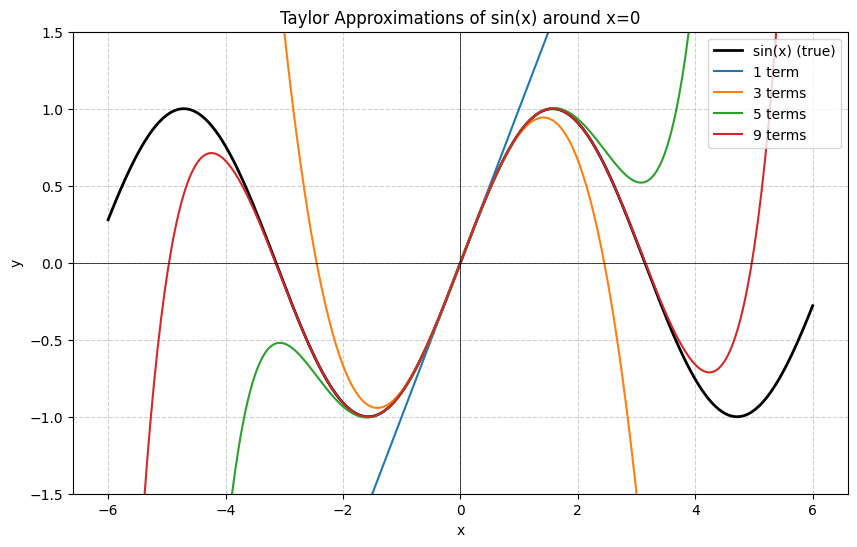

In [ ]:
# Example: Taylor Series of sin(x) around x = 0
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbol and function
x = sp.symbols('x')
f = sp.sin(x)

# General Taylor series expansion function
def taylor_series(func, var, point, order):
    return sp.series(func, var, point, order).removeO()

# Compute approximations
t1 = taylor_series(f, x, 0, 2)   # up to x
t2 = taylor_series(f, x, 0, 4)   # up to x^3
t3 = taylor_series(f, x, 0, 6)   # up to x^5
t4 = taylor_series(f, x, 0, 10)  # up to x^9

# Lambdify for plotting
f_lamb = sp.lambdify(x, f, 'numpy')
t1_lamb = sp.lambdify(x, t1, 'numpy')
t2_lamb = sp.lambdify(x, t2, 'numpy')
t3_lamb = sp.lambdify(x, t3, 'numpy')
t4_lamb = sp.lambdify(x, t4, 'numpy')

# Plot
X = np.linspace(-6, 6, 400)
plt.figure(figsize=(10, 6)) # Adjusted figure size
plt.plot(X, f_lamb(X), 'k', label='sin(x) (true)', linewidth=2) # Added linewidth for clarity
plt.plot(X, t1_lamb(X), label='1 term')
plt.plot(X, t2_lamb(X), label='3 terms')
plt.plot(X, t3_lamb(X), label='5 terms')
plt.plot(X, t4_lamb(X), label='9 terms')
plt.axhline(0, color='black', linewidth=0.5) # Added horizontal axis
plt.axvline(0, color='black', linewidth=0.5) # Added vertical axis
plt.legend()
plt.title("Taylor Approximations of sin(x) around x=0")
plt.xlabel("x") # Added x-label
plt.ylabel("y") # Added y-label
plt.ylim(-1.5, 1.5) # Adjusted y-limit for better visualization of sin(x)
plt.grid(True, linestyle='--', alpha=0.6) # Added grid
plt.show()

Big Picture & Real-World Applications

**Key Takeaways**

 Taylor series = local approximation
*   Approximates a function near a point using its derivatives.
*   Linear term = slope, quadratic term = curvature, cubic = "twist," etc.

 Accuracy grows with more terms
*   First term → constant
*   Second → tangent line
*   Third → adds curvature
*   Keep adding terms → polynomial matches function more globally

**Why it matters**

*   **Physics:** Small-angle approximations (sin θ ≈ θ), pendulum motion, quantum mechanics.
*   **Engineering / Numerical methods:** Solve differential equations, approximate complicated functions on computers.
*   **Machine Learning / Data Science:** Activation functions approximations, gradient computations, optimization.
*   **Computer Graphics / Simulations:** Fast approximation of functions without expensive calculations.

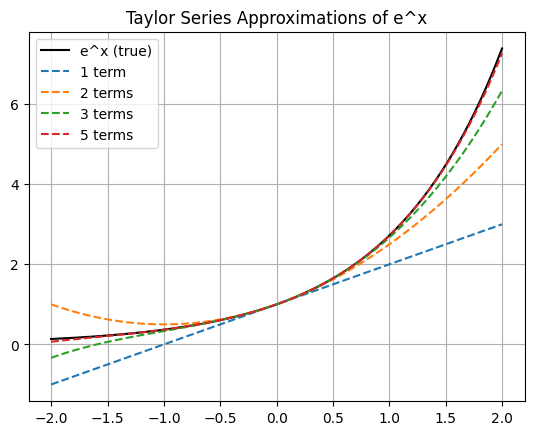

In [ ]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

x = sp.symbols('x')
f = sp.exp(x)  # true function

# Compute Taylor expansions of increasing order
orders = [2, 3, 4, 6]  # number of terms
approximations = [sp.series(f, x, 0, n).removeO() for n in orders]
labels = ['1 term', '2 terms', '3 terms', '5 terms']

# Lambdify for plotting
f_lamb = sp.lambdify(x, f, 'numpy')
approx_lambs = [sp.lambdify(x, t, 'numpy') for t in approximations]

X = np.linspace(-2, 2, 400)
plt.plot(X, f_lamb(X), 'k', label='e^x (true)')

for a_lamb, label in zip(approx_lambs, labels):
    plt.plot(X, a_lamb(X), linestyle='--', label=label)

plt.legend()
plt.title("Taylor Series Approximations of e^x")
plt.grid(True)
plt.show()
